# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [465]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

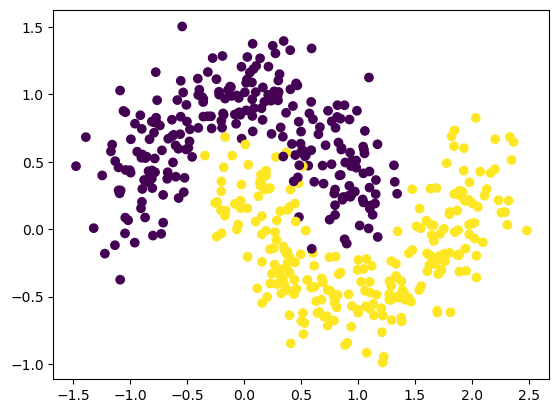

In [466]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [467]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(C=1.0) # add some params
svm = SVC(kernel='linear', C=0.1) # here too

### YOUR CODE HERE

X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, test_size=0.3, random_state=42)

In [468]:
lr.fit(X_train, y_train)
svm.fit(X_train, y_train)

y_lr_pred = lr.predict(X_test)
y_svm_linear_pred = svm.predict(X_test)

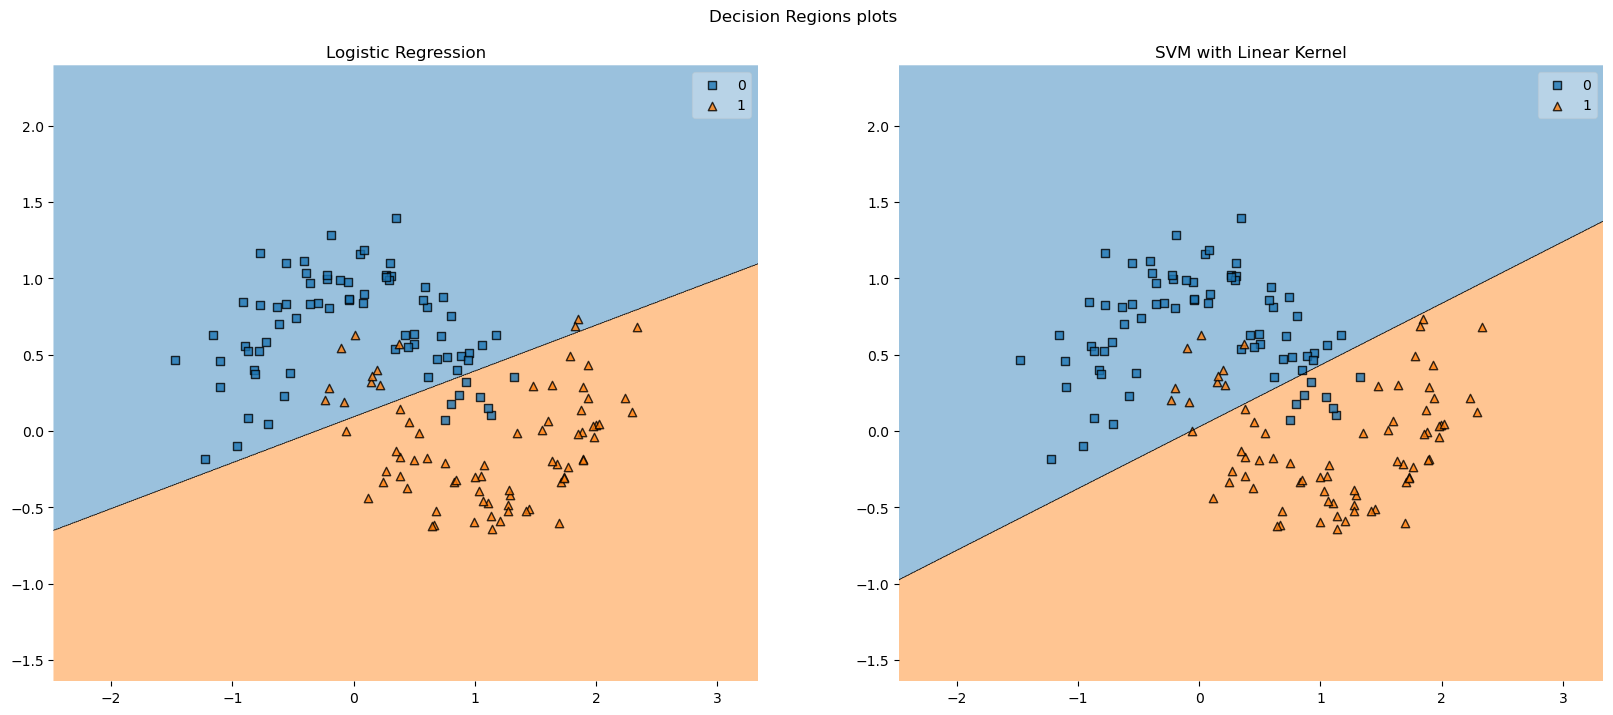

In [469]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
plt.suptitle('Decision Regions plots', y=0.95)

plt.subplot(1, 2, 1)
plot_decision_regions(X_test, y_test, clf=lr)
plt.title('Logistic Regression')

plt.subplot(1, 2, 2)
plot_decision_regions(X_test, y_test, clf=svm)
plt.title('SVM with Linear Kernel')

plt.show()

Из графиков видно, что классификации с помощью логистической регрессии и SVM с линейным ядром почти не отличаются.

In [470]:
lr_accuracy = accuracy_score(y_test, y_lr_pred)
svm_linear_accuracy = accuracy_score(y_test, y_svm_linear_pred)

print(f"Logistic Regression Accuracy: {lr_accuracy}")
print(f"SVM with Linear Kernel Accuracy: {svm_linear_accuracy}")

Logistic Regression Accuracy: 0.8666666666666667
SVM with Linear Kernel Accuracy: 0.88


Это подтверждают и совсем небольшие различия метрик.

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [471]:
### YOUR CODE HERE

svm_poly = SVC(kernel='poly', C=1.0, degree=3)
svm_rbf = SVC(kernel='rbf', C=1.0)
svm_sigmoid = SVC(kernel='sigmoid', C=1.0)

In [472]:
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
svm_sigmoid.fit(X_train, y_train)

y_svm_poly_pred = svm_poly.predict(X_test)
y_svm_rbf_pred = svm_rbf.predict(X_test)
y_svm_sigmoid_pred = svm_sigmoid.predict(X_test)

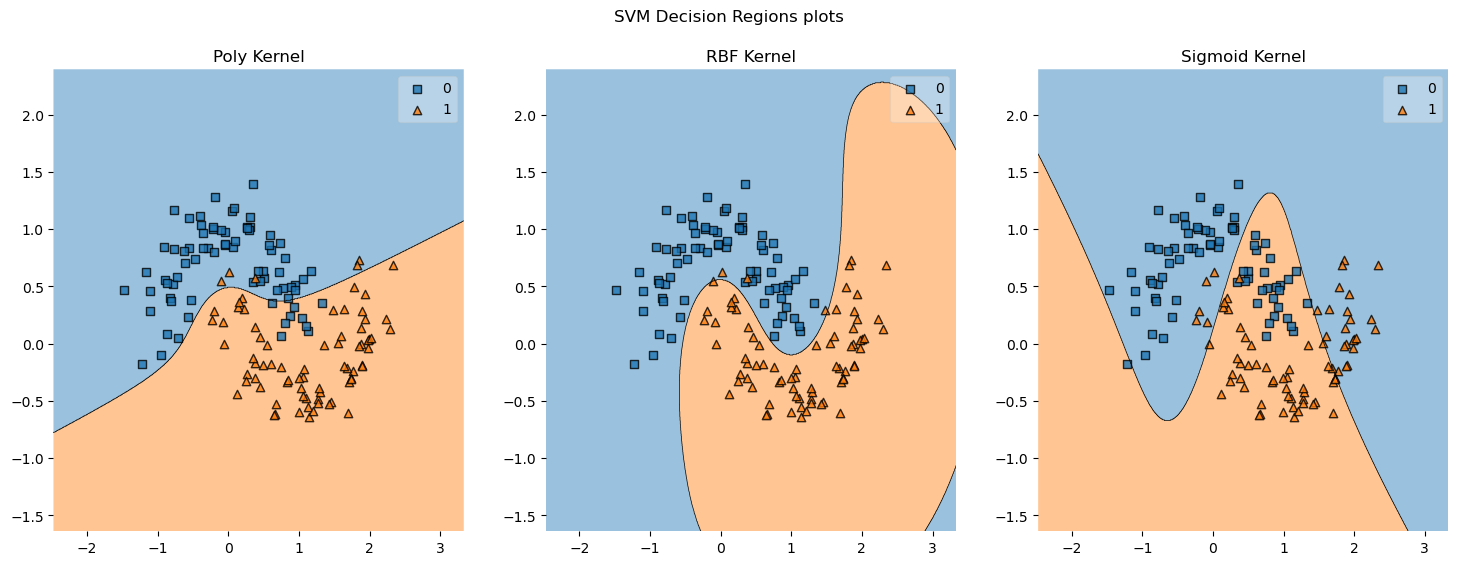

In [473]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.suptitle('SVM Decision Regions plots')

plt.subplot(1, 3, 1)
plot_decision_regions(X_test, y_test, clf=svm_poly)
plt.title('Poly Kernel')

plt.subplot(1, 3, 2)
plot_decision_regions(X_test, y_test, clf=svm_rbf)
plt.title('RBF Kernel')

plt.subplot(1, 3, 3)
plot_decision_regions(X_test, y_test, clf=svm_sigmoid)
plt.title('Sigmoid Kernel')

plt.show()

Из графиков видно, что наилучшей точностью в данном случае обладает SVM с ядром RBF, следующим идет полиномиальное ядро, хуже всех проявляется сигмоидное ядро. Граница изменилась в соответствии с ядром. Для полиномиального ядра взял степень 3, так спустя несколько попыток было выяснено, что именно она наиболее подходит.

In [474]:
svm_poly_accuracy = accuracy_score(y_test, y_svm_poly_pred)
svm_rbf_accuracy = accuracy_score(y_test, y_svm_rbf_pred)
svm_sigmoid_accuracy = accuracy_score(y_test, y_svm_sigmoid_pred)

print(f"SVM with Poly Kernel Accuracy: {svm_poly_accuracy}")
print(f"SVM with RBF Kernel Accuracy: {svm_rbf_accuracy}")
print(f"SVM with Sigmoid Kernel Accuracy: {svm_sigmoid_accuracy}")

SVM with Poly Kernel Accuracy: 0.9066666666666666
SVM with RBF Kernel Accuracy: 0.98
SVM with Sigmoid Kernel Accuracy: 0.62


Данные по точности подтверждаются accuracy score - с Poly и RBF точность увеличилась, с Sigmoid - упала.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [475]:
from sklearn.preprocessing import PolynomialFeatures

### YOUR CODE HERE

degree = 7

lr_poly = make_pipeline(PolynomialFeatures(degree), LogisticRegression())

In [476]:
lr_poly.fit(X_train, y_train)

y_lr_poly_pred = lr_poly.predict(X_test)

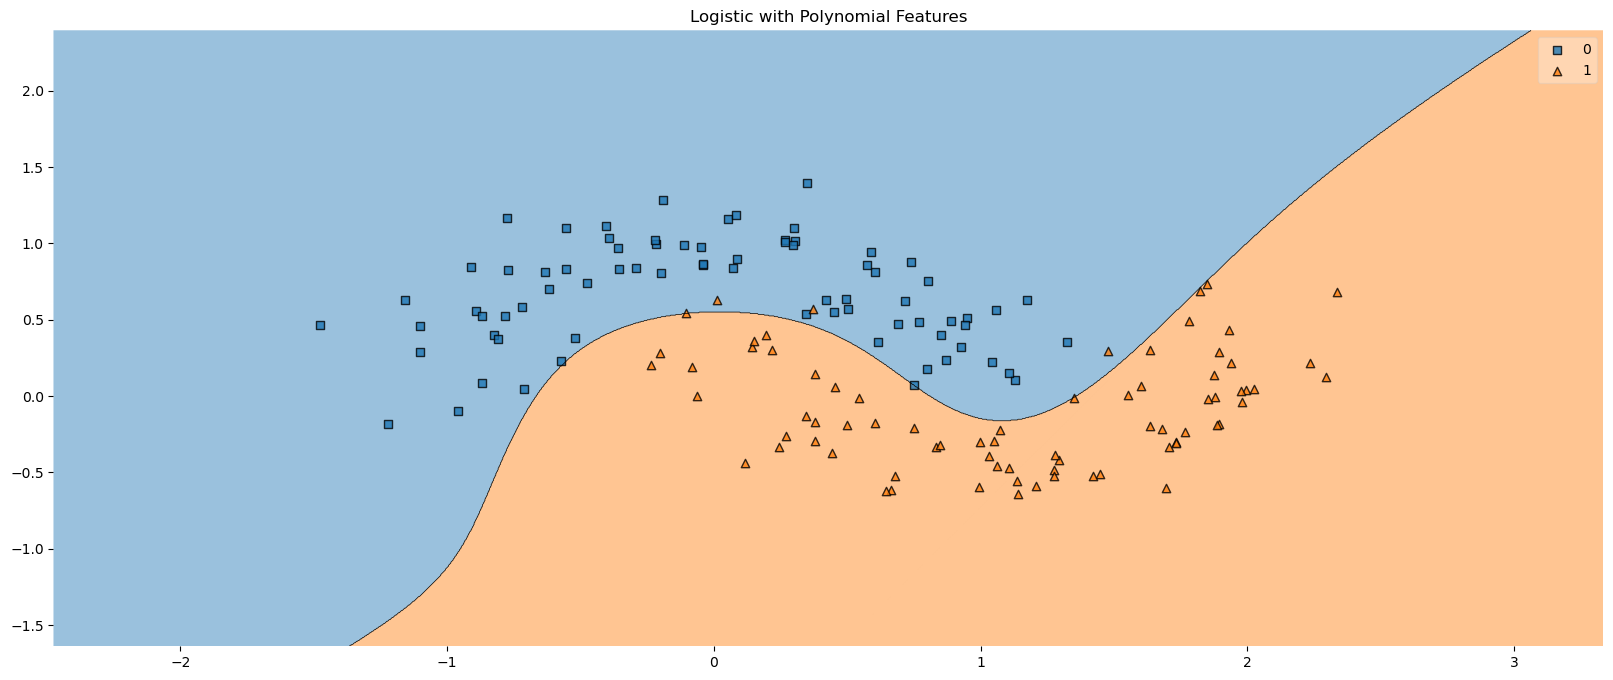

In [477]:
plt.figure(figsize=(20, 8))

plot_decision_regions(X_test, y_test, clf=lr_poly)
plt.title('Logistic with Polynomial Features')

plt.show()

График стал более похожим на график SVM с полиномиальным ядром.

In [478]:
lr_poly_accuracy = accuracy_score(y_test, y_lr_poly_pred)

print(f"Logistic Regression with Polynomial Features Accuracy: {lr_poly_accuracy}")

Logistic Regression with Polynomial Features Accuracy: 0.9733333333333334


По точности метод даже превзошел SVM с полиномиальным ядром, приблизившись к SVM с ядром RBF. При этом для достижения такой точности пришлось взять степень большую, чем в SVM с полиномиальным ядром.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

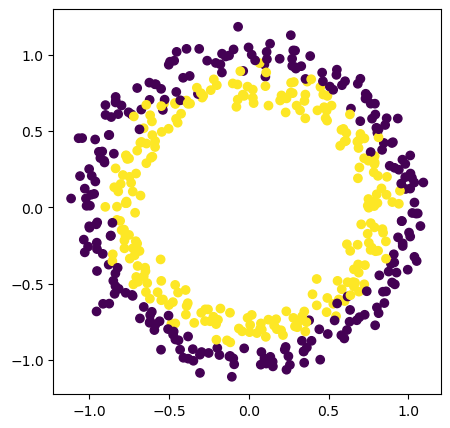

In [479]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

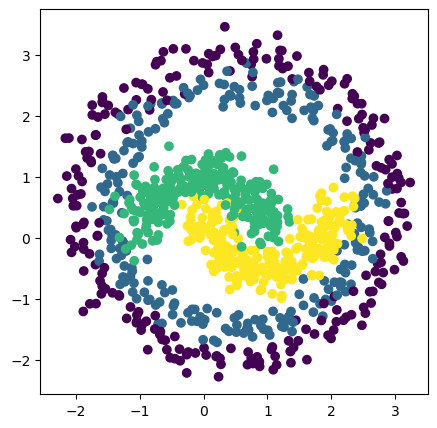

In [480]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [481]:
### YOUR CODE HERE

X_train, X_test, y_train, y_test = train_test_split(circles_points, circles_labels, test_size=0.3, random_state=42)

In [482]:
degree = 7
poly_log_reg = make_pipeline(PolynomialFeatures(degree=degree), LogisticRegression())
svm_rbf = SVC(kernel='rbf', C=1.0)

In [483]:
lr_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

y_lr_poly_pred = lr_poly.predict(X_test)
y_svm_rbf_pred = svm_rbf.predict(X_test)

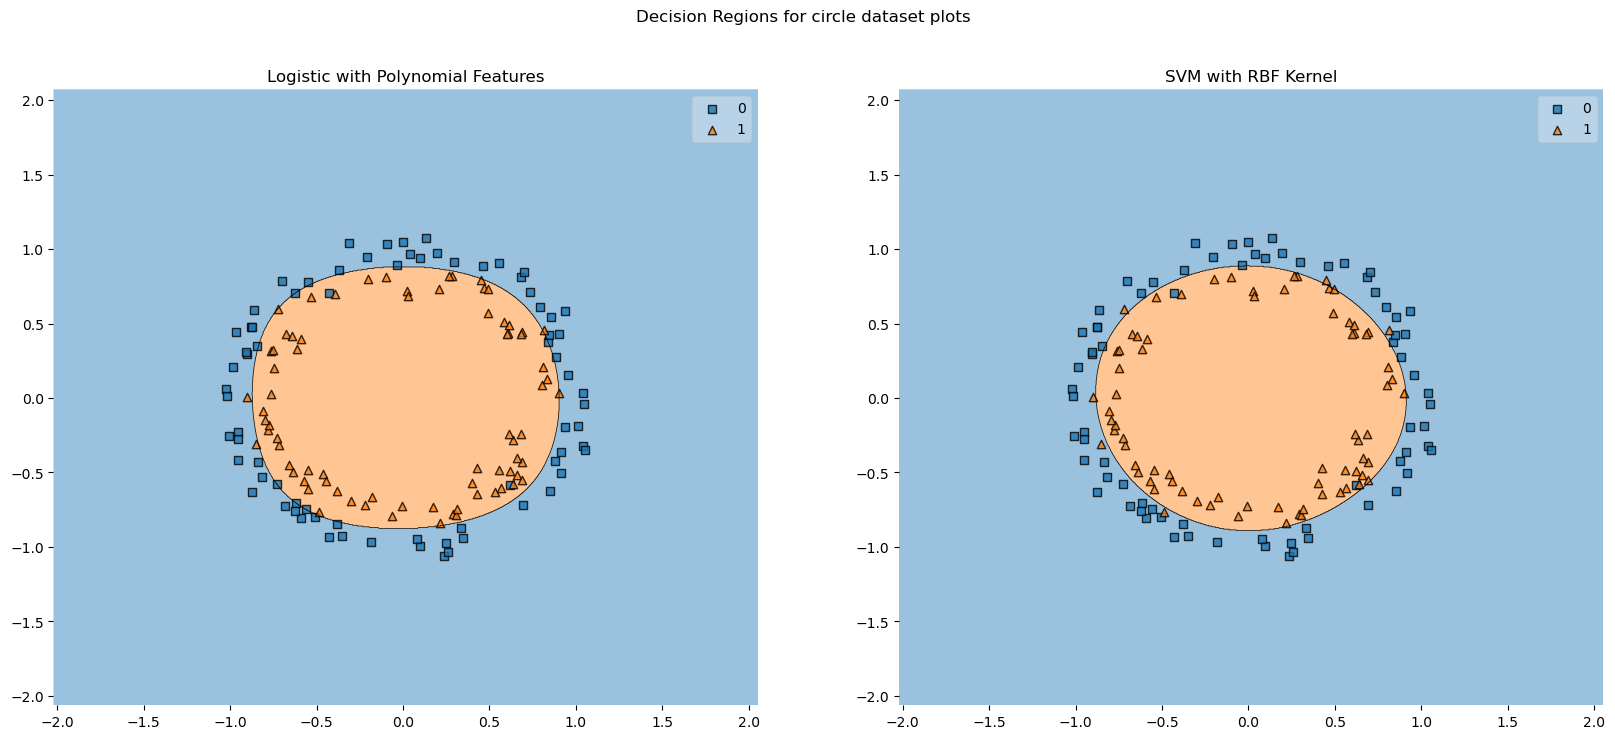

In [484]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
plt.suptitle('Decision Regions for circle dataset plots')

plt.subplot(1, 2, 1)
plot_decision_regions(X_test, y_test, clf=lr_poly)
plt.title('Logistic with Polynomial Features')

plt.subplot(1, 2, 2)
plot_decision_regions(X_test, y_test, clf=svm_rbf)
plt.title('SVM with RBF Kernel')

plt.show()

Графики методов почти одинаковые и проявляют хорошую точность.

In [485]:
lr_poly_accuracy = accuracy_score(y_test, y_lr_poly_pred)
svm_rbf_accuracy = accuracy_score(y_test, y_svm_rbf_pred)

print(f"Logistic Regression with Polynomial Features Accuracy: {lr_poly_accuracy}")
print(f"SVM with RBF Kernel Accuracy: {svm_rbf_accuracy}")

Logistic Regression with Polynomial Features Accuracy: 0.94
SVM with RBF Kernel Accuracy: 0.9466666666666667


Это подтверждается почти одинаковой высокой точностью.

In [486]:
X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=0.3, random_state=42)

In [487]:
lr_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

y_lr_poly_pred = lr_poly.predict(X_test)
y_svm_rbf_pred = svm_rbf.predict(X_test)

/Users/alexansemyachkin/miniconda3/envs/mipt_projects/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Users/alexansemyachkin/miniconda3/envs/mipt_projects/lib/python3.11/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/Users/alexansemyachkin/miniconda3/envs/mipt_projects/lib/python3.11/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


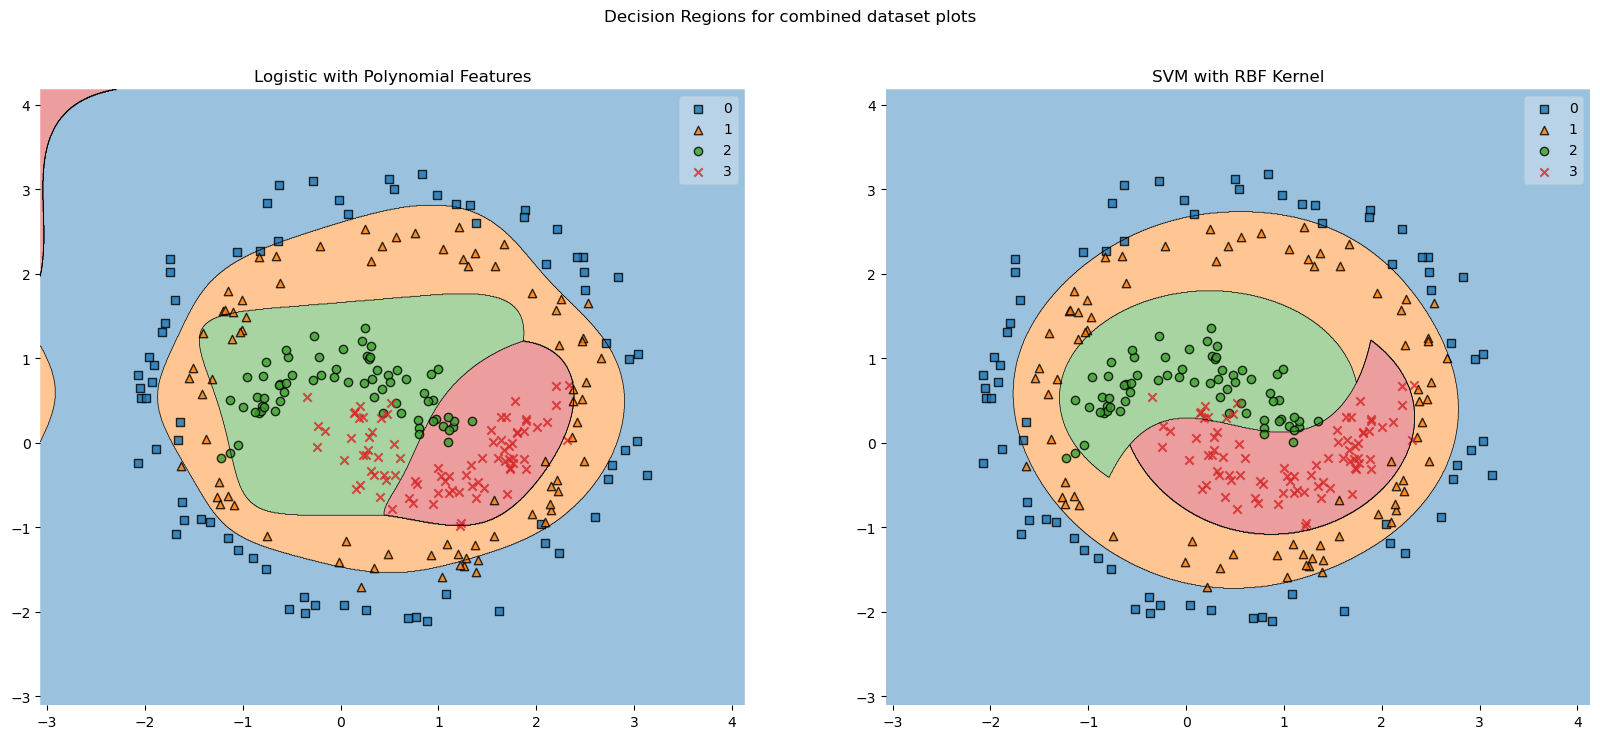

In [488]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
plt.suptitle('Decision Regions for combined dataset plots')

plt.subplot(1, 2, 1)
plot_decision_regions(X_test, y_test, clf=lr_poly)
plt.title('Logistic with Polynomial Features')

plt.subplot(1, 2, 2)
plot_decision_regions(X_test, y_test, clf=svm_rbf)
plt.title('SVM with RBF Kernel')

plt.show()

Ввиду сложности графика в обоих случаях уже больше точек не попадают в границы, но тем не менее большинство определяются верно.

In [489]:
lr_poly_accuracy = accuracy_score(y_test, y_lr_poly_pred)
svm_rbf_accuracy = accuracy_score(y_test, y_svm_rbf_pred)

print(f"Logistic Regression with Polynomial Features Accuracy: {lr_poly_accuracy}")
print(f"SVM with RBF Kernel Accuracy: {svm_rbf_accuracy}")

Logistic Regression with Polynomial Features Accuracy: 0.7766666666666666
SVM with RBF Kernel Accuracy: 0.9133333333333333


И в соответствии с графиками видно, что у логистической регрессии произошли довольно сильные потери в точночти, а SVM с RBF ядром все еще очень точно делает предсказания.